In [122]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.arima.model import ARIMA

# Data Import and Cleaning

In [123]:
df = pd.read_excel("/Users/surajkwork/Documents/Thesis/thesis/final_df_2.xlsx")

In [124]:
df.head()

,Unnamed: 0,week,wPreis,Plz,Category,Behandelt,full
0,0,2020-37,-37.519318,"['25', '24']",A2,geschreddert,Kategorie A2 - geschreddert
1,1,2020-39,-40.000000,"['25', '24']",A2,geschreddert,Kategorie A2 - geschreddert
2,2,2020-41,-34.853543,"['25', '24']",A2,geschreddert,Kategorie A2 - geschreddert
3,3,2020-42,-27.560202,"['25', '24']",A2,geschreddert,Kategorie A2 - geschreddert
4,4,2020-43,-31.937780,"['25', '24']",A2,geschreddert,Kategorie A2 - geschreddert


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5773 entries, 0 to 5772
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5773 non-null   int64  
 1   week        5773 non-null   object 
 2   wPreis      5773 non-null   float64
 3   Plz         5773 non-null   object 
 4   Category    5773 non-null   object 
 5   Behandelt   5773 non-null   object 
 6   full        5773 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 315.8+ KB


In [126]:
len(df['Plz'].unique()) # print(unique_values)

10

In [127]:
df['Plz'].unique()

array(["['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']",
       "['29', '30', '31', '38', '39']",
       "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']",
       "['40', '41', '42', '44', '45', '46', '47']",
       "['50', '51', '52', '53']", "['70', '71', '73', '74', '75', '76']",
       "['80', '81', '82', '83', '84', '85', '93', '94']"], dtype=object)

In [128]:
df['Category'].unique()

array(['A2', 'A1 & A2', 'A2 & A3', 'A3'], dtype=object)

In [129]:
df['Behandelt'].unique()

array(['geschreddert', 'ungeschreddert'], dtype=object)

In [130]:
df['full'].unique() 

array(['Kategorie A2 -  geschreddert',
       'Kategorie A1 & A2 -  geschreddert',
       'Kategorie A2 & A3 -  geschreddert',
       'Kategorie A3 -  geschreddert', 'Kategorie A3 -  ungeschreddert',
       'Kategorie A2 & A3 -  ungeschreddert',
       'Kategorie A1 & A2 -  ungeschreddert'], dtype=object)

The date variable is not in datetime format so it has to be converted.

In [131]:
df['full'] = df['full'].str.replace('Kategorie ', '')
df.head()


,Unnamed: 0,week,wPreis,Plz,Category,Behandelt,full
0,0,2020-37,-37.519318,"['25', '24']",A2,geschreddert,A2 - geschreddert
1,1,2020-39,-40.000000,"['25', '24']",A2,geschreddert,A2 - geschreddert
2,2,2020-41,-34.853543,"['25', '24']",A2,geschreddert,A2 - geschreddert
3,3,2020-42,-27.560202,"['25', '24']",A2,geschreddert,A2 - geschreddert
4,4,2020-43,-31.937780,"['25', '24']",A2,geschreddert,A2 - geschreddert


In [132]:
df.drop(columns=['Unnamed: 0', 'Category', 'Behandelt'], inplace=True)
df.head()



,week,wPreis,Plz,full
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert


In [133]:
df.head()

,week,wPreis,Plz,full
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert


In [134]:
# Convert the 'week' column to datetime format
df['date'] = pd.to_datetime(df['week'] + '-1', format='%Y-%W-%w')
df.index = df['date']
# df.index = pd.DatetimeIndex(df.index).to_period('W')
df.sort_index(inplace=True)

In [135]:
df.head()

,week,wPreis,Plz,full,date
date,,,,,
2020-09-14,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-37.519318,"['25', '24']",A1 & A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-23.445068,"['80', '81', '82', '83', '84', '85', '93', '94']",A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-36.379163,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-27.983877,"['25', '24']",A2 & A3 - geschreddert,2020-09-14


In [136]:
df.tail()

,week,wPreis,Plz,full,date
date,,,,,
2024-04-22,2024-17,7.216049,"['50', '51', '52', '53']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,33.349057,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,2.409250,"['25', '24']",A2 - geschreddert,2024-04-22
2024-04-22,2024-17,10.850000,"['26', '27', '28']",A3 - geschreddert,2024-04-22
2024-04-22,2024-17,40.367961,"['80', '81', '82', '83', '84', '85', '93', '94']",A2 & A3 - geschreddert,2024-04-22


In [137]:
df['date']= pd.to_datetime(df['date'])
df.index = df['date']
df.sort_index(inplace=True)

In [138]:
df_cleaned = df 

%store df_cleaned

Stored 'df_cleaned' (DataFrame)


Extracting one cluster from the dataset for analysis.

In [139]:
TS1 = df[(df['Plz'] == "['25', '24']")]

And from this cluster, extracting one category for analysis.

In [140]:
TS1_A2 = TS1[TS1['full'] == 'A2 -  geschreddert']

In [141]:
TS1_A1A2 = TS1[TS1['full'] == 'A1 & A2 -  geschreddert']
TS1_A2A3 = TS1[TS1['full'] == 'A2 & A3 -  geschreddert']

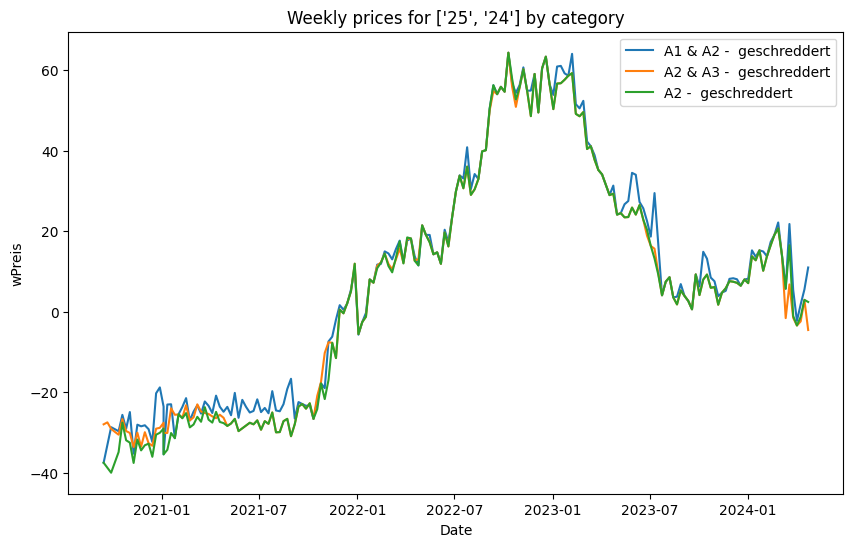

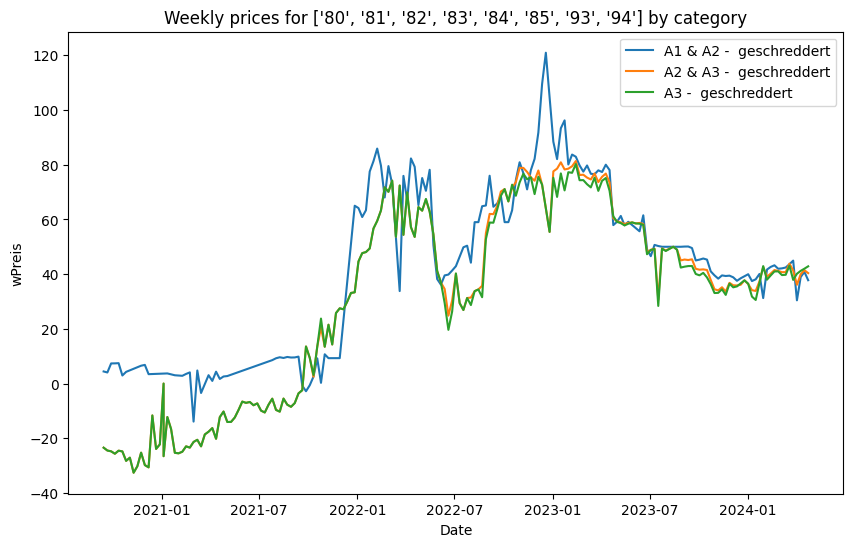

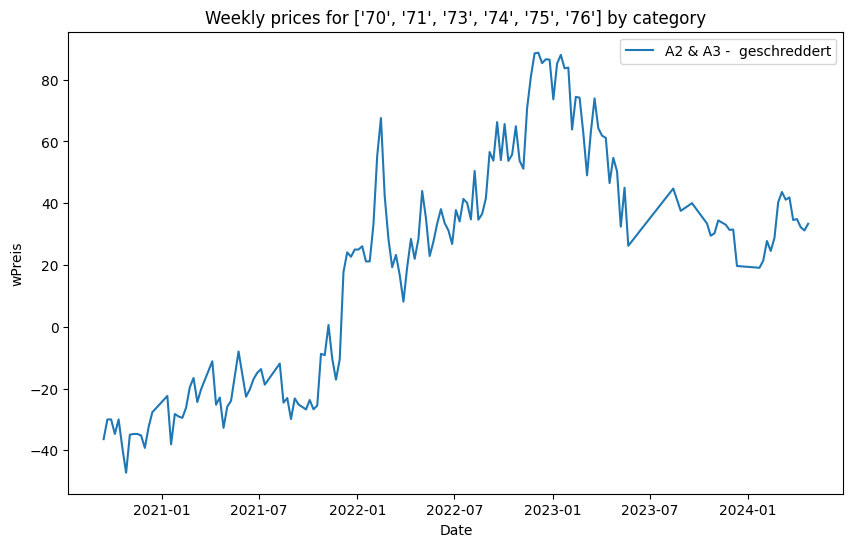

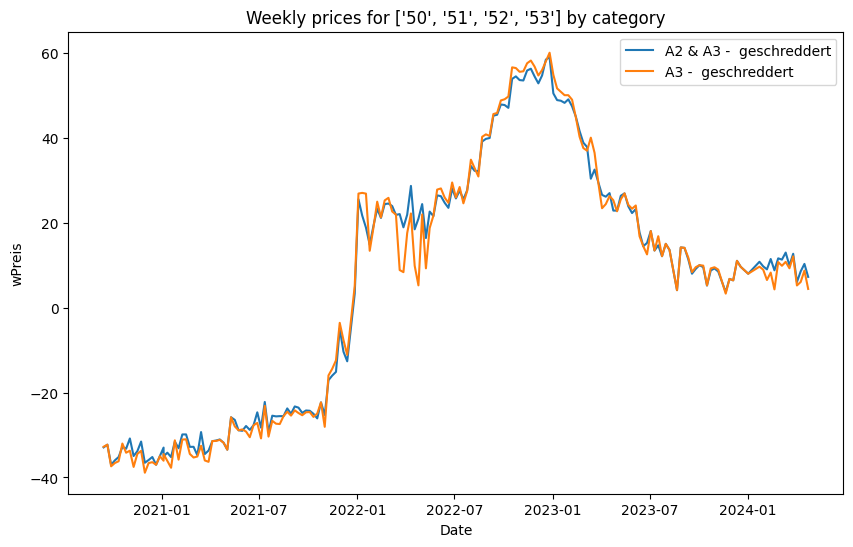

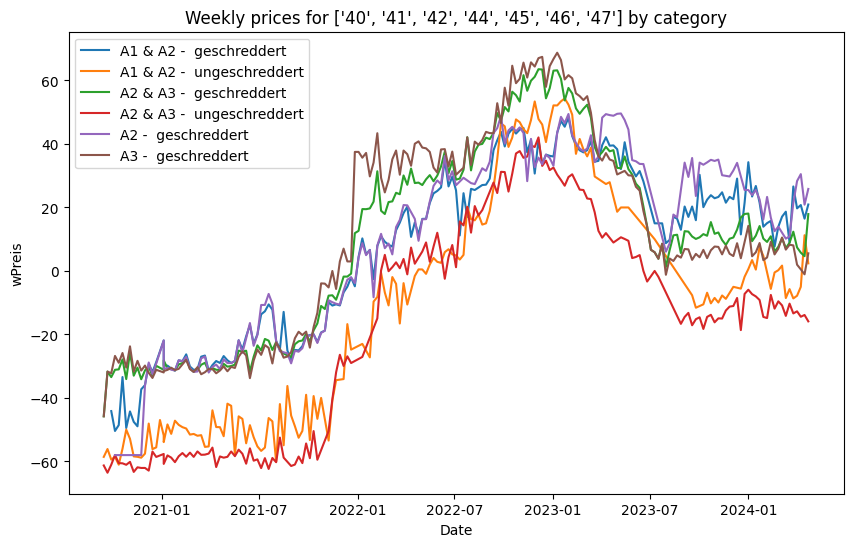

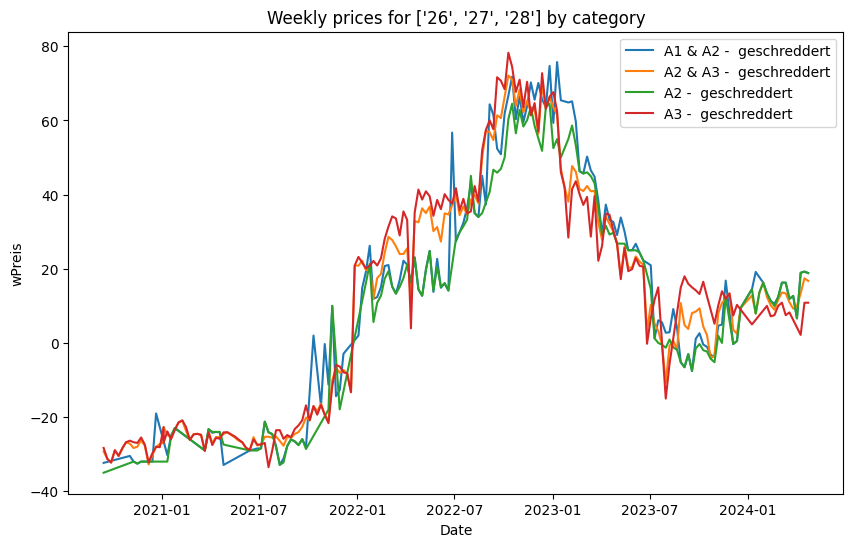

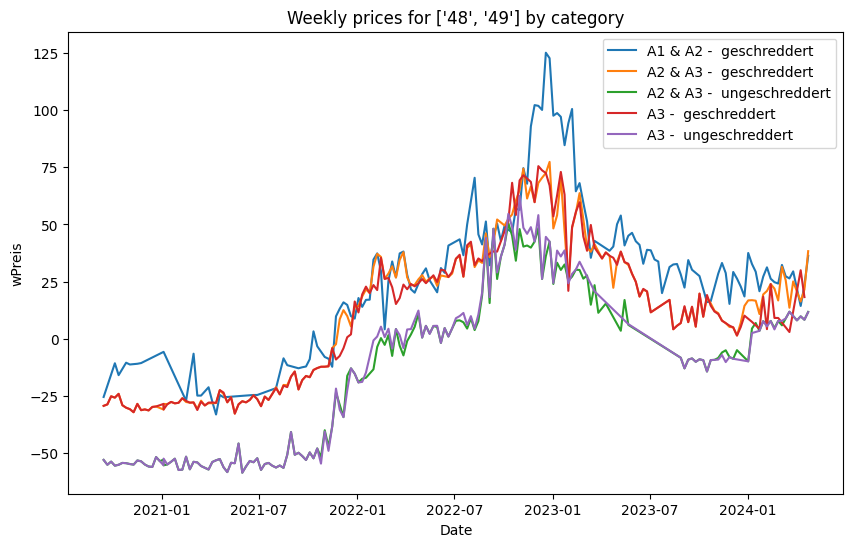

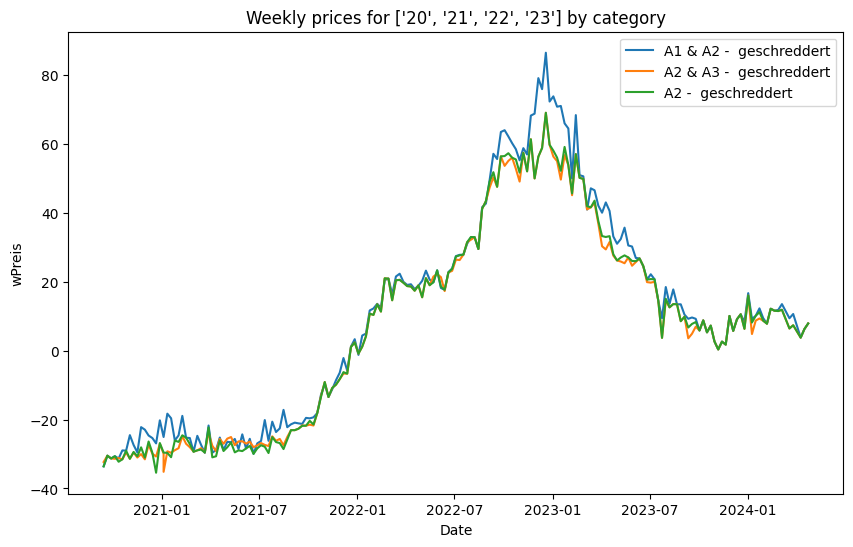

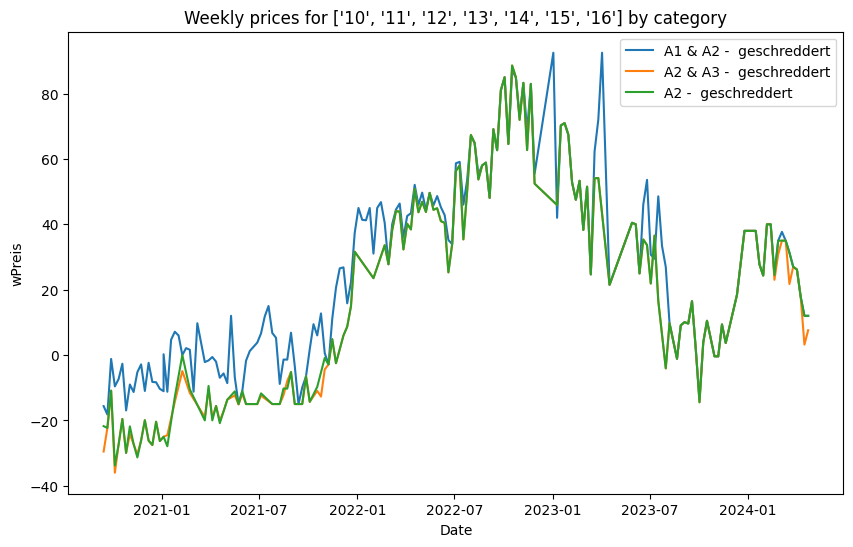

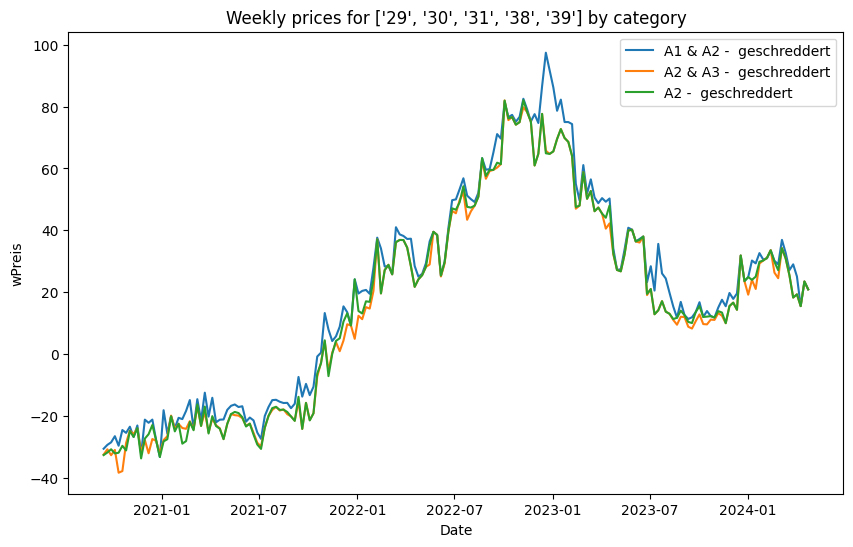

In [142]:
categories = df['Plz'].unique()

# Loop through each category
for category in categories:
    # Filter the dataframe for the current category
    TS = df[df['Plz'] == category]
    
    # Create the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    for _, group in TS.groupby('full'):
        plt.plot(group['date'], group['wPreis'], label=group['full'].iloc[0])  # Plot each group separately
    
    # Add title and labels
    plt.title(f'Weekly prices for {category} by category')
    plt.xlabel('Date')
    plt.ylabel('wPreis')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

In [143]:
# Get unique categories in the 'Plz' column
categories = df['Plz'].unique()

# Loop through each category
for category in categories:
    # Filter the dataframe for the current category
    TS1 = df[df['Plz'] == category]
    
    # Create the plot
    fig = px.line(TS1, x='date', y='wPreis', color='full', title=f'Weekly Prices for {category} by Category')
    fig.show()